In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# Which data
dataset = 'dia'
# fetch data 

if dataset == 'admission':
    admission_data = pd.read_csv('Datasets/admission_data_ng.csv')
    admission_data.head()
else:
    diabetes_data = pd.read_csv('Datasets/diabetes.csv')
    diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


Text(0.5, 0, 'Pregnancies')

Text(0, 0.5, 'Outcome')

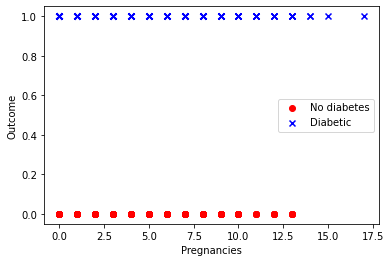

Text(0.5, 0, 'Glucose')

Text(0, 0.5, 'Outcome')

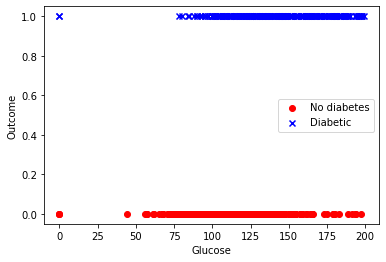

Text(0.5, 0, 'BloodPressure')

Text(0, 0.5, 'Outcome')

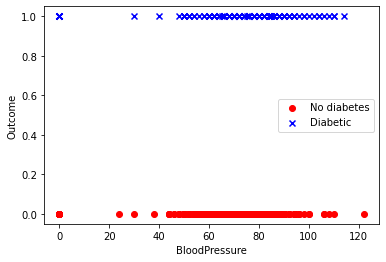

Text(0.5, 0, 'SkinThickness')

Text(0, 0.5, 'Outcome')

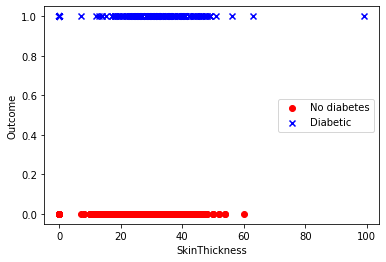

Text(0.5, 0, 'Insulin')

Text(0, 0.5, 'Outcome')

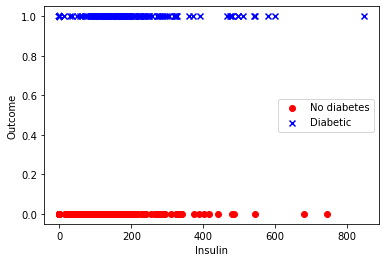

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Outcome')

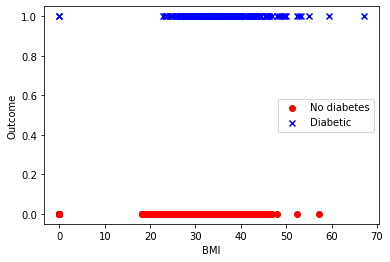

Text(0.5, 0, 'DiabetesPedigreeFunction')

Text(0, 0.5, 'Outcome')

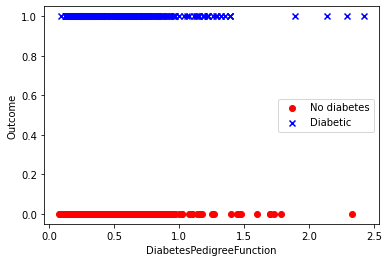

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Outcome')

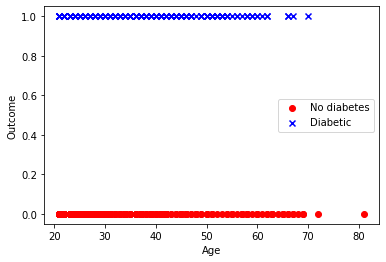

In [3]:
# plot the features against the classification
if dataset == 'admission':
    X0 = admission_data[admission_data['Admit'] == 0]
    X1 = admission_data[admission_data['Admit'] == 1]
    plt.scatter(X0['Test 1 Score'], X0['Test 2 Score'], color = 'red', marker = 'o', label = 'reject')
    plt.scatter(X1['Test 1 Score'], X1['Test 2 Score'], color = 'blue', marker = 'x', label = 'admit')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='lower left')
    plt.show()
else: 
    X0 = diabetes_data[diabetes_data['Outcome'] == 0]
    X1 = diabetes_data[diabetes_data['Outcome'] == 1]
    for col in diabetes_data.drop(columns=['Outcome']).columns: 
        plt.scatter(X0[col], X0['Outcome'], color = 'red', marker = 'o', label = 'No diabetes')
        plt.scatter(X1[col], X1['Outcome'], color = 'blue', marker = 'x', label = 'Diabetic')
        plt.xlabel(col)
        plt.ylabel('Outcome')
        plt.legend(loc='center right')
        plt.show()


In [4]:
if False & (dataset != 'admission'):
    len(diabetes_data)
    diabetes_data = diabetes_data[diabetes_data['Glucose'] > 0]
    diabetes_data = diabetes_data[diabetes_data['BloodPressure'] > 0]
    diabetes_data = diabetes_data[diabetes_data['SkinThickness'] > 0]
    diabetes_data = diabetes_data[diabetes_data['BMI'] > 0]
    len(diabetes_data)

In [5]:
if dataset == 'admission':
    admission_data.isna().sum()
else:
    diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
if dataset == 'admission':
    X_train, X_test, y_train, y_test = train_test_split(admission_data.drop(columns = ['Admit']), admission_data['Admit'], test_size=0.2, stratify = admission_data['Admit'], random_state=50)
else: 
    X_train, X_test, y_train, y_test = train_test_split(diabetes_data.drop(columns = ['Outcome']), diabetes_data['Outcome'], test_size=0.2, stratify = diabetes_data['Outcome'], random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train
y_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
377,1,87,60,37,75,37.20,0.51,22
687,1,107,50,19,0,28.30,0.18,29
613,6,105,80,28,0,32.50,0.88,26
31,3,158,76,36,245,31.60,0.85,28
557,8,110,76,0,0,27.80,0.24,58
...,...,...,...,...,...,...,...,...
84,5,137,108,0,0,48.80,0.23,37
229,0,117,80,31,53,45.20,0.09,24
361,5,158,70,0,0,29.80,0.21,63
346,1,139,46,19,83,28.70,0.65,22


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
463,5,88,78,30,0,27.60,0.26,37
352,3,61,82,28,0,34.40,0.24,46
2,8,183,64,0,0,23.30,0.67,32
705,6,80,80,36,0,39.80,0.18,28
443,8,108,70,0,0,30.50,0.95,33
...,...,...,...,...,...,...,...,...
188,8,109,76,39,114,27.90,0.64,31
77,5,95,72,33,0,37.70,0.37,27
349,5,0,80,32,0,41.00,0.35,37
432,1,80,74,11,60,30.00,0.53,22


377    0
687    0
613    0
31     1
557    0
      ..
84     1
229    0
361    0
346    0
654    0
Name: Outcome, Length: 614, dtype: int64

463    0
352    0
2      1
705    0
443    1
      ..
188    1
77     0
349    1
432    0
707    0
Name: Outcome, Length: 154, dtype: int64

In [7]:
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'auto', penalty = 'none')
# If the lbfgs throws an error, try to increase max_iter (add max_iter = 1000), also try another algorithm, scaling is also suggested
# While using multiclass case do multi_class = 'over' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

0.7768729641693811

array([[ 0.11038542,  0.03565678, -0.01403043, -0.00628243, -0.00136435,
         0.08916448,  1.16001455,  0.01986751]])

array([-8.51175607])

In [8]:
if dataset == 'admission':
    test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Admit'])
else:
    test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Outcome'])
#test_output.head()
print(test_output)

     pred_Outcome
463             0
352             0
2               1
705             0
443             0
..            ...
188             0
77              0
349             0
432             0
707             0

[154 rows x 1 columns]


In [9]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,pred_Outcome,Outcome
463,0,0
352,0,0
2,1,1
705,0,0
443,0,1


Percentage of correct predictions is 
0.7857142857142857


In [10]:
test_output = test_output.merge(X_test, left_index = True, right_index = True)
test_output.head()

,pred_Outcome,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
463,0,0,5,88,78,30,0,27.60,0.26,37
352,0,0,3,61,82,28,0,34.40,0.24,46
2,1,1,8,183,64,0,0,23.30,0.67,32
705,0,0,6,80,80,36,0,39.80,0.18,28
443,0,1,8,108,70,0,0,30.50,0.95,33


In [11]:
if dataset == 'admission': 
    model.predict_proba(admission_data.drop(columns = ['Admit']))
else:
    model.predict_proba(diabetes_data.drop(columns = ['Outcome']))

array([[0.28611764, 0.71388236],
       [0.95622415, 0.04377585],
       [0.18371274, 0.81628726],
       ...,
       [0.85024383, 0.14975617],
       [0.67436033, 0.32563967],
       [0.93872887, 0.06127113]])

In [12]:
data_with_prob = X_train.copy()
if dataset == 'admission':
    data_with_prob['Admit'] = y_train
else: 
    data_with_prob['Outcome'] = y_train
# Next we give the probability of predicting 1 (in multiclass, there will be probabilities by class)
if dataset == 'admission':
    data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Admit']))[:,1]
else: 
    data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Outcome']))[:,1]
data_with_prob.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Probability
377,1,87,60,37,75,37.20,0.51,22,0,0.11
687,1,107,50,19,0,28.30,0.18,29,0,0.11
613,6,105,80,28,0,32.50,0.88,26,0,0.27
31,3,158,76,36,245,31.60,0.85,28,1,0.55
557,8,110,76,0,0,27.80,0.24,58,0,0.30


In [13]:
if dataset == 'admission':
    test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Admit', 'pred_Admit']))[:,1]
else:
    test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Outcome', 'pred_Outcome']))[:,1]
test_output.head()

,pred_Outcome,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Probability
463,0,0,5,88,78,30,0,27.60,0.26,37,0.07
352,0,0,3,61,82,28,0,34.40,0.24,46,0.04
2,1,1,8,183,64,0,0,23.30,0.67,32,0.82
705,0,0,6,80,80,36,0,39.80,0.18,28,0.12
443,0,1,8,108,70,0,0,30.50,0.95,33,0.43


#### Visualize data

In [14]:
# plot the features against the classification [Training]
if dataset == 'admission':
    X0_right = data_with_prob[(data_with_prob['Admit'] == 0) & (data_with_prob['Probability'] < 0.5)]
    X1_right = data_with_prob[(data_with_prob['Admit'] == 1) & (data_with_prob['Probability'] >= 0.5)]
    X0_wrong = data_with_prob[(data_with_prob['Admit'] == 0) & (data_with_prob['Probability'] >= 0.5)]
    X1_wrong = data_with_prob[(data_with_prob['Admit'] == 1) & (data_with_prob['Probability'] < 0.5)]

    plt.scatter(X0_right['Test 1 Score'], X0_right['Test 2 Score'], color = 'red', marker = 'o', label = 'reject accurate')
    plt.scatter(X1_right['Test 1 Score'], X1_right['Test 2 Score'], color = 'blue', marker = 'x', label = 'admit accurate')
    plt.scatter(X0_wrong['Test 1 Score'], X0_wrong['Test 2 Score'], color = 'black', marker = 'o', label = 'reject inaccurate')
    plt.scatter(X1_wrong['Test 1 Score'], X1_wrong['Test 2 Score'], color = 'cyan', marker = 'x', label = 'admit inaccurate')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='lower left')
    plt.show()

Text(0.5, 0, 'Pregnancies')

Text(0, 0.5, 'Outcome')

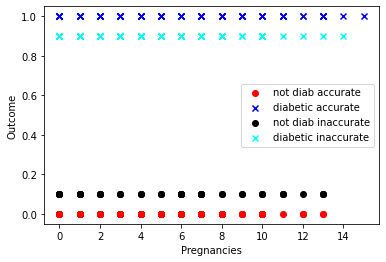

Text(0.5, 0, 'Glucose')

Text(0, 0.5, 'Outcome')

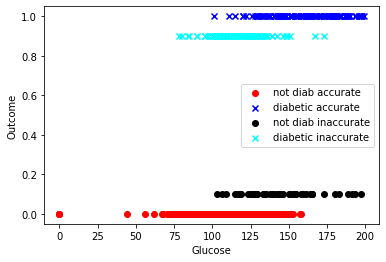

Text(0.5, 0, 'BloodPressure')

Text(0, 0.5, 'Outcome')

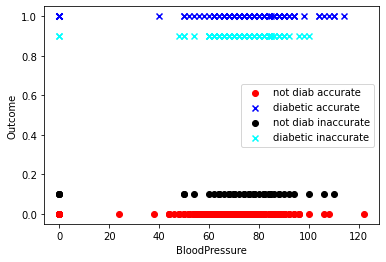

Text(0.5, 0, 'SkinThickness')

Text(0, 0.5, 'Outcome')

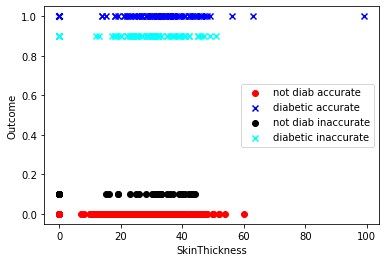

Text(0.5, 0, 'Insulin')

Text(0, 0.5, 'Outcome')

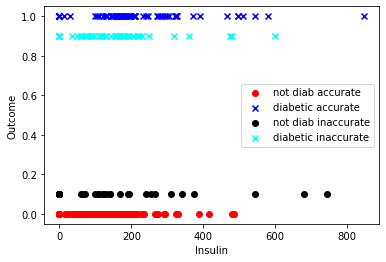

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Outcome')

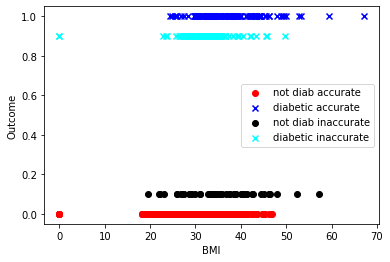

Text(0.5, 0, 'DiabetesPedigreeFunction')

Text(0, 0.5, 'Outcome')

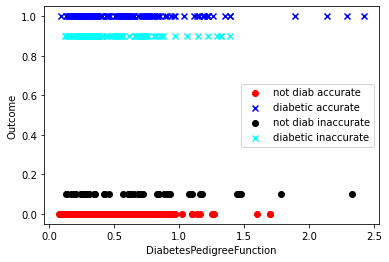

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Outcome')

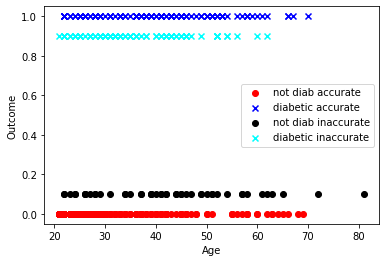

In [15]:
if dataset != 'admission':
    for col in diabetes_data.drop(columns=['Outcome']).columns:
        X0_right = data_with_prob[(data_with_prob['Outcome'] == 0) & (data_with_prob['Probability'] < 0.5)]
        X1_right = data_with_prob[(data_with_prob['Outcome'] == 1) & (data_with_prob['Probability'] >= 0.5)]
        X0_wrong = data_with_prob[(data_with_prob['Outcome'] == 0) & (data_with_prob['Probability'] >= 0.5)]
        X1_wrong = data_with_prob[(data_with_prob['Outcome'] == 1) & (data_with_prob['Probability'] < 0.5)]
        plt.scatter(X0_right[col], X0_right['Outcome'], color = 'red', marker = 'o', label = 'not diab accurate')
        plt.scatter(X1_right[col], X1_right['Outcome'], color = 'blue', marker = 'x', label = 'diabetic accurate')
        plt.scatter(X0_wrong[col], X0_wrong['Outcome'] + 0.1, color = 'black', marker = 'o', label = 'not diab inaccurate')
        plt.scatter(X1_wrong[col], X1_wrong['Outcome'] - 0.1, color = 'cyan', marker = 'x', label = 'diabetic inaccurate')
        plt.xlabel(col)
        plt.ylabel('Outcome')
        plt.legend(loc='center right')
        plt.show()

In [16]:
# plot the features against the classification [Testing]
if dataset == 'admission':
    X0_right = test_output[(test_output['Admit'] == 0) & (test_output['Probability'] < 0.5)]
    X1_right = test_output[(test_output['Admit'] == 1) & (test_output['Probability'] >= 0.5)]
    X0_wrong = test_output[(test_output['Admit'] == 0) & (test_output['Probability'] >= 0.5)]
    X1_wrong = test_output[(test_output['Admit'] == 1) & (test_output['Probability'] < 0.5)]

    plt.scatter(X0_right['Test 1 Score'], X0_right['Test 2 Score'], color = 'red', marker = 'o', label = 'reject accurate')
    plt.scatter(X1_right['Test 1 Score'], X1_right['Test 2 Score'], color = 'blue', marker = 'x', label = 'admit accurate')
    plt.scatter(X0_wrong['Test 1 Score'], X0_wrong['Test 2 Score'], color = 'black', marker = 'o', label = 'reject inaccurate')
    plt.scatter(X1_wrong['Test 1 Score'], X1_wrong['Test 2 Score'], color = 'cyan', marker = 'x', label = 'admit inaccurate')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='upper left')
    plt.show()

Text(0.5, 0, 'Pregnancies')

Text(0, 0.5, 'Outcome')

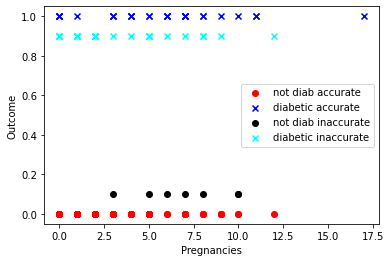

Text(0.5, 0, 'Glucose')

Text(0, 0.5, 'Outcome')

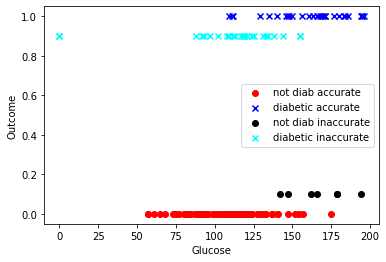

Text(0.5, 0, 'BloodPressure')

Text(0, 0.5, 'Outcome')

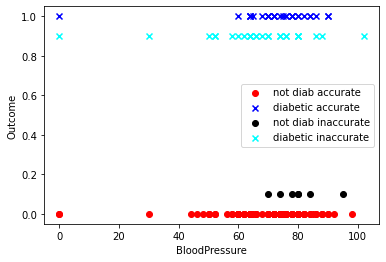

Text(0.5, 0, 'SkinThickness')

Text(0, 0.5, 'Outcome')

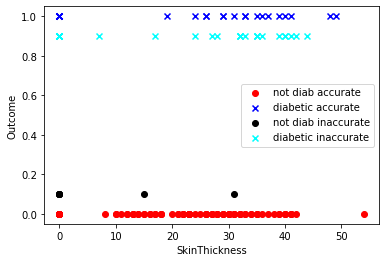

Text(0.5, 0, 'Insulin')

Text(0, 0.5, 'Outcome')

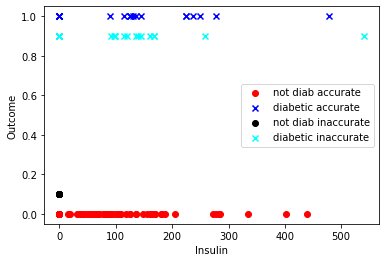

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Outcome')

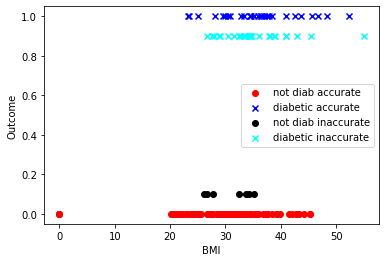

Text(0.5, 0, 'DiabetesPedigreeFunction')

Text(0, 0.5, 'Outcome')

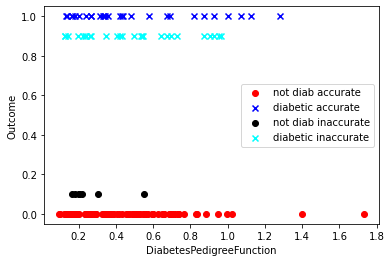

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Outcome')

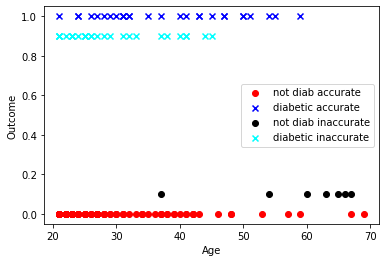

In [17]:
if dataset != 'admission':
    for col in diabetes_data.drop(columns=['Outcome']).columns: 
        X0_right = test_output[(test_output['Outcome'] == 0) & (test_output['Probability'] < 0.5)]
        X1_right = test_output[(test_output['Outcome'] == 1) & (test_output['Probability'] >= 0.5)]
        X0_wrong = test_output[(test_output['Outcome'] == 0) & (test_output['Probability'] >= 0.5)]
        X1_wrong = test_output[(test_output['Outcome'] == 1) & (test_output['Probability'] < 0.5)]
        plt.scatter(X0_right[col], X0_right['Outcome'], color = 'red', marker = 'o', label = 'not diab accurate')
        plt.scatter(X1_right[col], X1_right['Outcome'], color = 'blue', marker = 'x', label = 'diabetic accurate')
        plt.scatter(X0_wrong[col], X0_wrong['Outcome'] + 0.1, color = 'black', marker = 'o', label = 'not diab inaccurate')
        plt.scatter(X1_wrong[col], X1_wrong['Outcome'] - 0.1, color = 'cyan', marker = 'x', label = 'diabetic inaccurate')
        plt.xlabel(col)
        plt.ylabel('Outcome')
        plt.legend(loc='center right')
        plt.show()